# Corpus Statistics
Retrieve statistics for the entire corpus. The code below asks for all documents in the timespan of 100 years. It then reads every document, gives the amount of tokens and the amount of words (tokens excl. punctuation). The results are grouped per year, and thus per volume. From the meta data is the amount of pages distilled per volume and an average per document. The results are stored in DataFrames and can be plotted to a graph. This is done for the count and mean words per volume. 

# 1837-1936

In [7]:
%matplotlib inline

from pynlpl.formats import folia

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

import sys 
import os
sys.path.append('/home/vanwissen/degids/')

import pickle

from modules.DeGids.DeGids import FoliaCorpus
from modules.DeGids.DeGids import DeGids
from collections import defaultdict
import string

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

/home/vanwissen/.conda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Corpus and meta data

In [199]:
CORPUS = "/mnt/scistor1/group/home/vanwissen/degids_1837_1936/"
METAFILES = "/home/vanwissen/degids/data/metadata_auteursinformatie/"

In [200]:
DG = DeGids(corpuspath=CORPUS, 
            metafile=METAFILES,
            gzipped=False)

# Statistics

Let's count the amount of tokens and words:

In [ ]:
# select all documents for given years
documents = DG.select(years=(1837,1936), output='filenames')

# store the results in a list
results = []

for filename in documents:
    
    filepath = os.path.join(CORPUS, filename)
    
    # meta data
    fileid = DG.file2id(filename)
    year = DG.meta[fileid]["year"]
    
    # ask for all tokens
    reader = folia.Reader(filepath, folia.Word)
    n_tokens = sum(1 for w in reader)
    
    # ask for all words
    reader = folia.Reader(filepath, folia.Word)
    n_words = sum(1 for w in reader if w.cls != "PUNCTUATION")
    
    print(year, n_tokens, n_words)
    
    results.append([year, n_tokens, n_words])
    
# For reanalysis later
with open('results_statistics.pickle', 'wb') as picklefile:
    pickle.dump(results, picklefile)


1837 2565 2177
1837 3125 2735
1837 2204 1859
1837 2647 2245
1837 1097 952
1837 2036 1750
1837 667 580
1837 3078 2479
1837 3361 2837
1837 1135 976
1837 517 434
1837 3992 3342
1837 2256 1956
1837 402 338
1837 3286 2840
1837 3329 2888
1837 1309 1118
1837 1417 1195
1837 1976 1682
1837 3022 2603
1837 1553 1332
1837 1887 1590
1837 4752 3961
1837 1272 1084
1837 2259 1899
1837 1231 1079
1837 1115 986
1837 6931 5953
1837 1459 1213
1837 533 461
1837 3264 2774
1837 1472 1302
1837 3980 3403
1837 1483 1238
1837 1361 1137
1837 1821 1520
1837 4270 3667
1837 2445 2105
1837 4683 4072
1837 1339 1156
1837 1279 1097
1837 2227 1859
1837 844 720
1837 1424 1216
1837 3215 2682
1837 1420 1172
1837 214 183
1837 914 767
1837 4873 4218
1837 2345 1967
1837 1872 1561
1837 6245 5156
1837 3646 3027
1837 9459 7348
1837 2469 2096
1837 1647 1438
1837 1422 1124
1837 4862 3972
1837 3380 2798
1837 901 763
1837 1616 1369
1837 4576 3871
1837 6639 5717
1837 2736 2239
1837 2196 1826
1837 3355 2866
1837 3163 2707
1837 3382 2817

### Restore previews results

In [3]:
with open('results_statistics.pickle', 'rb') as picklefile:
    results = pickle.load(picklefile)

<hr>

### Turn this into a DataFrame

In [4]:
pd.set_option('precision', 0)

df = pd.DataFrame.from_records(results)
df.columns = ["year", "tokens", "words"]
df_results = df.groupby(['year']).agg(['count','sum', 'mean', 'median', 'min', 'max', 'std'])

<hr>

Only interested in words, so take only this portion:

In [42]:
df_words = df_results["words"]
totals = pd.DataFrame(df_words.sum()).T
totals = totals.rename({0:'total'})

df_words_totals = pd.concat((df_words, totals))

The blow formatter is needed to print the table to latex with thousand separators and without any decimals (not useful for these numbers).

In [226]:
num_format = lambda x: "{:,.0f}".format(x)

def build_formatters(df, format):
    return {
        column:format for (column, dtype) in df.dtypes.iteritems()
        if dtype in [np.dtype('int64'), np.dtype('float64')]
    }

formatters = build_formatters(df_words, num_format)

Print the words table to LaTeX with a totals row at the bottom. 

In [44]:
print(df_words_totals.to_latex(bold_rows=True,formatters=formatters))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  count &        sum &    mean &  median &    min &       max &     std \\
\midrule
\textbf{1837 } &    174 &    445,643 &   2,561 &   2,408 &     69 &     8,490 &   1,747 \\
\textbf{1838 } &    158 &    475,201 &   3,008 &   2,947 &    135 &    11,722 &   2,131 \\
\textbf{1839 } &    145 &    474,478 &   3,272 &   2,621 &     12 &    14,385 &   2,637 \\
\textbf{1840 } &    128 &    445,806 &   3,483 &   3,122 &     59 &    18,718 &   2,771 \\
\textbf{1841 } &    117 &    445,096 &   3,804 &   3,124 &     13 &    12,583 &   2,966 \\
\textbf{1842 } &    103 &    503,909 &   4,892 &   4,203 &    159 &    15,846 &   3,578 \\
\textbf{1843 } &    111 &    510,911 &   4,603 &   3,580 &    234 &    22,706 &   3,816 \\
\textbf{1844 } &    119 &    517,694 &   4,350 &   3,795 &    100 &    16,299 &   3,101 \\
\textbf{1845 } &     82 &    585,718 &   7,143 &   5,872 &    132 &    70,491 &   8,168 \\
\textbf{1846 } &     73 &    577,011 &   7,904 &   7,813 &

# Pages
Maybe it is also insightful to know how much the size of the magazine differs over time with respect to the amount of pages. For this, the amount of pages per article can be retrieved from the metadata. 

In [201]:
documents = DG.select(years=(1837,1936), output='filenames')

In [211]:
total_pages = []

for file in documents:
    docid = DG.file2id(file)
    
    year = DG.meta[docid]["year"]
    pages = DG.meta[docid]["pages"]
    
    total_pages.append((year,pages))
    

In [212]:
d = defaultdict(list)

for year, pages in total_pages:
    
    begin, end = pages
    total = end - begin + 1
    
    d[year].append(begin)
    d[year].append(end)
    
d_pages = dict()

# For each year, take the maximum and the miminum value. Substract + 1 and this is the size of a volume. 
for k, v in d.items():
    d_pages[k] = (max(v)-min(v)+1), (max(v)-min(v)+1)/(len(v)/2)

Turn this into a dataframe with a totals row. This df is the same length as the words df, so they can be easily concatenated. 

In [221]:
df_pages = pd.DataFrame(d_pages).T
df_pages.columns = ['sum', 'mean']

totals_p = pd.DataFrame(df_pages.sum()).T
totals_p = totals_p.rename({0:'total'})

df_pages_totals = pd.concat((df_pages, totals_p))
totals_p

sum  mean
total  63814   698

In [246]:
df_counts = df_words_totals['count']
del df_words_totals['count']

Concatenate the two DataFrames: The words and the pages. 

In [247]:
df_pages_words = pd.concat([df_counts, df_pages_totals, df_words_totals], axis=1, keys=['', 'pages', 'words'])

Then, turn this into a LaTeX table for insertion in the thesis: 

In [248]:
print(df_pages_words.to_latex(bold_rows=True,formatters=formatters))

\begin{tabular}{lrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{pages} & \multicolumn{6}{l}{words} \\
{} &  count &    sum & mean &        sum &    mean &  median &    min &       max &     std \\
\midrule
\textbf{1837 } &    174 &    641 &    4 &    445,643 &   2,561 &   2,408 &     69 &     8,490 &   1,747 \\
\textbf{1838 } &    158 &    673 &    4 &    475,201 &   3,008 &   2,947 &    135 &    11,722 &   2,131 \\
\textbf{1839 } &    145 &    613 &    4 &    474,478 &   3,272 &   2,621 &     12 &    14,385 &   2,637 \\
\textbf{1840 } &    128 &    637 &    5 &    445,806 &   3,483 &   3,122 &     59 &    18,718 &   2,771 \\
\textbf{1841 } &    117 &    657 &    6 &    445,096 &   3,804 &   3,124 &     13 &    12,583 &   2,966 \\
\textbf{1842 } &    103 &    680 &    7 &    503,909 &   4,892 &   4,203 &    159 &    15,846 &   3,578 \\
\textbf{1843 } &    111 &    726 &    7 &    510,911 &   4,603 &   3,580 &    234 &    22,706 &   3,816 \\
\textbf{1844 } &    119 &    746 &    6 &    517

In [237]:
pd.options.display.float_format = '{:,.0f}'.format

In [238]:
df_pages_words

pages       words                                                    
         sum mean  count        sum    mean  median    min       max     std
1837     641    4    174    445,643   2,561   2,408     69     8,490   1,747
1838     673    4    158    475,201   3,008   2,947    135    11,722   2,131
1839     613    4    145    474,478   3,272   2,621     12    14,385   2,637
1840     637    5    128    445,806   3,483   3,122     59    18,718   2,771
1841     657    6    117    445,096   3,804   3,124     13    12,583   2,966
1842     680    7    103    503,909   4,892   4,203    159    15,846   3,578
1843     726    7    111    510,911   4,603   3,580    234    22,706   3,816
1844     746    6    119    517,694   4,350   3,795    100    16,299   3,101
1845     998   12     82    585,718   7,143   5,872    132    70,491   8,168
1846     904   12     73    577,011   7,904   7,813    153    20,161   4,873
1847   1,029   11     91    580,002   6,374   4,953    159    32,753   5,708
1848     812   11     72    510,799   7,094   5,982    160    20,211   4,920
1849     804   13     60    537,252   8,954   8,278  1,309    25,148   4,783
1850     796   13     59    525,639   8,909   7,770    142    21,128   4,756
1851     804   11     71    580,757   8,180   7,424    422    19,239   4,683
1852     836   13     64    586,333   9,161   7,871    249    22,798   5,772
1853     796   14     57    561,578   9,852   8,640  2,350    22,224   4,875
1854     868   15     59    594,909  10,083   9,597    679    28,642   6,990
1855     816   16     52    584,126  11,233  10,670    661    24,426   5,587
1856     888   17     52    650,914  12,518  12,940    399    22,147   5,331
1857     880   16     54    643,524  11,917  11,460    281    28,640   6,323
1858     988   17     59    671,764  11,386  12,077    204    26,666   7,304
1859     909   14     63    686,993  10,905   9,557    105    28,745   7,831
1860     900   14     65    663,682  10,210   8,508    189    26,794   6,442
1861     973   15     63    673,172  10,685  10,319    728    23,040   5,842
1862   1,024   17     62    785,846  12,675  11,512  2,869    28,512   6,450
1863     592    7     80    885,106  11,064  10,672     92    27,799   6,151
1864     632    7     90    854,557   9,495   9,499     68    23,083   5,313
1865     607    8     79    858,683  10,869   9,749    785    27,684   5,663
1866     616    7     85    848,365   9,981   9,246    415    23,978   4,921
...      ...  ...    ...        ...     ...     ...    ...       ...     ...
1908     623    4    148    745,521   5,037   2,850    142    24,328   4,989
1909     623    4    164    708,963   4,323   3,068     85    18,919   3,734
1910     600    3    177    724,182   4,091   2,812    107    14,858   3,331
1911     619    5    132    679,804   5,150   2,510     72    27,453   5,720
1912     589    4    147    734,651   4,998   2,662     79    23,133   5,229
1913     597    4    137    741,729   5,414   2,875    118    31,555   6,128
1914     594    4    138    729,585   5,287   4,558    172    31,549   4,782
1915     602    5    126    738,410   5,860   4,075     90    24,997   5,234
1916     587    4    149    718,009   4,819   2,954     60    24,631   4,948
1917     585    4    145    711,862   4,909   2,744     15    18,790   4,905
1918     582    5    128    669,498   5,230   4,241     78    25,095   5,096
1919     523    4    120    622,019   5,183   3,719     65    21,669   5,056
1920     520    4    135    674,195   4,994   3,481     97    21,181   4,886
1921     531    4    137    676,684   4,939   3,363     84    23,012   4,960
1922     530    4    145    681,201   4,698   3,212     79    22,070   4,420
1923     521    4    144    673,206   4,675   3,576     78    16,614   4,206
1924     460    3    132    550,610   4,171   3,034     92    18,551   4,120
1925     459    3    133    521,984   3,925   3,076     69    18,556   3,600
1926     446    4    118    536,663   4,548   3,372     64    19,491   4,184
192

# Graph

Not everything can be plotted to a graph, but to quickly see how the size of the magazine fluctuates over time, plotting the amount of articles per volume and the average word count per article to a graph can be insightful. 

In [249]:
sns.color_palette('colorblind', n_colors=3)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)]

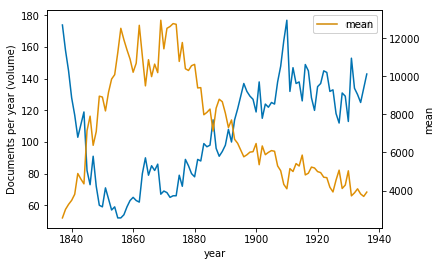

In [115]:
ax = sns.lineplot(x='year', y='count', label='count', data=df_words.reset_index(), palette=sns.color_palette('colorblind'), color=(0.00392156862745098, 0.45098039215686275, 0.6980392156862745))
ax.set_ylabel('Documents per year (volume)')

ax2 = ax.twinx()
ax3 = sns.lineplot(x='year', y='mean', label='mean', data=df_words.reset_index(), ax=ax2, palette=sns.color_palette('colorblind'), color=(0.8705882352941177, 0.5607843137254902, 0.0196078431372549))

In [109]:
ax3.set_ylabel('Words mean per year (volume)')
plt.show()

I want this as tikz picture

In [192]:
from matplotlib2tikz import save as tikz_save

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


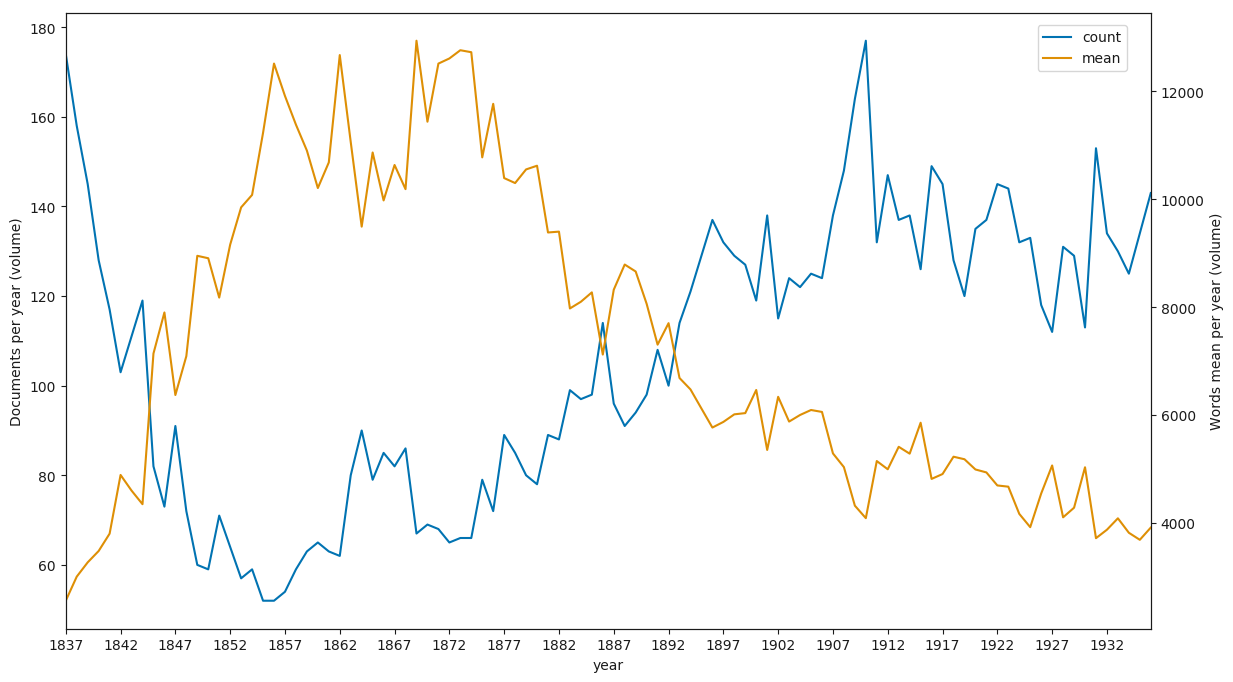

In [196]:
fig = plt.figure(figsize=(14,8))

ax = sns.lineplot(x='year',
                  y='count',
                  data=df_words.reset_index(),
                  palette=sns.color_palette('colorblind'),
                  color=(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
                 )

ax.set_xticks(range(1837,1937)[::5])
ax.set_xlim(1837,1936)

ax2 = ax.twinx()

sns.lineplot(x='year',
             y='mean',
             data=df_words.reset_index(),
             ax=ax2,
             palette=sns.color_palette('colorblind'),
             color=(0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
            )

ax.set_ylabel('Documents per year (volume)')
ax2.set_ylabel('Words mean per year (volume)')

fig.legend(labels=['count','mean'], loc="upper right", bbox_to_anchor = (.81, .83))

tikz_save('count_mean.tikz',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')

Oh yes, they do correlate quite much. 

In [267]:
pearsonr(df_words["count"],df_words["mean"])

(-0.895413598865131, 3.2651973503444753e-36)